# Project 1: Digit Classification with KNN and Naive Bayes

In this project, you'll implement your own image recognition system for classifying digits. Read through the code and the instructions carefully and add your own code where indicated. Each problem can be addressed succinctly with the included packages -- please don't add any more. Grading will be based on writing clean, commented code, along with a few short answers.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but <b> please prepare your own write-up (with your own code). </b>

If you're interested, check out these links related to digit recognition:

Yann Lecun's MNIST benchmarks: http://yann.lecun.com/exdb/mnist/

Stanford Streetview research and data: http://ufldl.stanford.edu/housenumbers/

In [1]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# Import a bunch of libraries.
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Set the randomizer seed so results are the same each time.
np.random.seed(0)

ImportError: cannot import name RandomForest

In [114]:
# Load the data
amazon = pd.read_csv("amazon.csv")
amazon

# # Shuffle the input: create a random permutation of the integers between 0 and the number of data points and apply this
# # permutation to X and Y.
# # NOTE: Each time you run this cell, you'll re-shuffle the data, resulting in a different ordering.
# shuffle = np.random.permutation(np.arange(X.shape[0]))
# X, Y = X[shuffle], Y[shuffle]

# print 'data shape: ', X.shape
# print 'label shape:', Y.shape

# # Set some variables to hold test, dev, and training data.
# test_data, test_labels = X[61000:], Y[61000:]
# dev_data, dev_labels = X[60000:61000], Y[60000:61000]
# train_data, train_labels = X[:60000], Y[:60000]
# mini_train_data, mini_train_labels = X[:1000], Y[:1000]

data shape:  (70000, 784)
label shape: (70000,)


(1) Create a 10x10 grid to visualize 10 examples of each digit. Python hints:

- plt.rc() for setting the colormap, for example to black and white
- plt.subplot() for creating subplots
- plt.imshow() for rendering a matrix
- np.array.reshape() for reshaping a 1D feature vector into a 2D matrix (for rendering)

[5 pts]

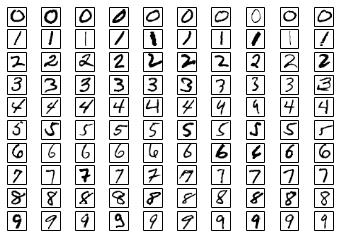

In [28]:
def P1(num_examples=10):
#     set colormap to grey
    plt.rc('image', cmap="Greys")
#     create sorted list of digits
    classes = list(set(Y))
    classes.sort()
    i = 0 
    for classie in classes:
#         find example image of each digit
        class_examples = X[Y==classie][:num_examples]
        for class_example in class_examples:
#             create a subplot for the example and remove axes for clarity
            ax = plt.subplot(len(classes), num_examples, i + 1) 
            plt.setp(ax, xticks=(), yticks=())
#         convert example array to a 28 x 28 matrix for rendering
            mtrx = np.reshape(class_example, (28, 28))
#         render example
            plt.imshow(mtrx) 
            i += 1



P1(10)

(2) Evaluate a K-Nearest-Neighbors model with k = [1,3,5,7,9] using the mini training set. Report accuracy on the dev set. For k=1, show precision, recall, and F1 for each label. Which is the most difficult digit?

- KNeighborsClassifier() for fitting and predicting
- classification_report() for producing precision, recall, F1 results

[3 pts]

In [78]:
def P2(k_values):
    for k_value in k_values:
#         initialize and fit K-Nearest-Neighbors classifier for the current value of k
        knn = KNeighborsClassifier(n_neighbors=k_value)
        knn.fit(mini_train_data, mini_train_labels)
#         predict the labels of the development data
        dev_preds = knn.predict(dev_data)
        print("dev set accuracy with k = " + str(k_value) + ":")
        print(str(np.mean(dev_labels==dev_preds)) + "\n")
#         product a full classification report for k=1
        if k_value == 1:
            class_report = classification_report(dev_labels, dev_preds)
            print(class_report)
            
        
k_values = [1, 3, 5, 7, 9]
P2(k_values)

dev set accuracy with k = 1:
0.888

             precision    recall  f1-score   support

        0.0       0.91      0.98      0.94        99
        1.0       0.89      1.00      0.94       105
        2.0       0.99      0.79      0.88       102
        3.0       0.77      0.87      0.82        86
        4.0       0.89      0.82      0.85       104
        5.0       0.93      0.84      0.88        91
        6.0       0.94      0.96      0.95        98
        7.0       0.89      0.92      0.90       113
        8.0       0.94      0.88      0.91        96
        9.0       0.78      0.82      0.80       106

avg / total       0.89      0.89      0.89      1000

dev set accuracy with k = 3:
0.878

dev set accuracy with k = 5:
0.869

dev set accuracy with k = 7:
0.865

dev set accuracy with k = 9:
0.863



ANSWER: With k=1, overall, 9 is the most difficult digit to properly classify. However, 3 is predicted with less precision.

(3) Using k=1, report dev set accuracy for the training set sizes below. Also, measure the amount of time needed for prediction with each training size.

- time.time() gives a wall clock value you can use for timing operations

[2 pts]

In [387]:
def P3(train_sizes, accuracies):
#     initialize K-Nearest-Neighbors classifier with k=1
    knn = KNeighborsClassifier(n_neighbors=1)
    for train_size in train_sizes:
#         get a sample of data and labels of the current training size
        curr_train_data, curr_train_labels = X[:train_size], Y[:train_size]
#         train the classifier
        knn.fit(curr_train_data, curr_train_labels)
#         determine accuracy of classifier on dev data and labels, logging how long it takes
        start_time = time.time()
        accuracy = knn.score(dev_data, dev_labels)
        end_time = time.time()
        print("accuracy for training size = " + str(train_size) + ":")
        print(str(accuracy) + "\n")
        tot_time = end_time - start_time
        print("time needed for prediction:")
        print(str(tot_time) + " seconds\n")
        accuracies.append(accuracy)

        
train_sizes = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25000]
accuracies = []
P3(train_sizes, accuracies)

accuracy for training size = 100:
0.72

time needed for prediction:
0.193691968918 seconds

accuracy for training size = 200:
0.786

time needed for prediction:
0.253820896149 seconds

accuracy for training size = 400:
0.841

time needed for prediction:
0.678505897522 seconds

accuracy for training size = 800:
0.884

time needed for prediction:
1.2782728672 seconds

accuracy for training size = 1600:
0.902

time needed for prediction:
2.51490902901 seconds

accuracy for training size = 3200:
0.926

time needed for prediction:
4.644313097 seconds

accuracy for training size = 6400:
0.937

time needed for prediction:
8.49464797974 seconds

accuracy for training size = 12800:
0.959

time needed for prediction:
16.8426589966 seconds

accuracy for training size = 25000:
0.97

time needed for prediction:
34.1727237701 seconds



(4) Fit a regression model that predicts accuracy from training size. What does it predict for n=60000? What's wrong with using regression here? Can you apply a transformation that makes the predictions more reasonable?

[3 pts]

In [181]:
def P4():
#     initialize a regression model
    lr = LinearRegression()
#     format training data sizes as a list of arrays
    X = np.reshape(train_sizes, (9, 1))
#     fit the regression model and predict the accuracy of the knn classifier with a training size of 60,000
    lr.fit(X, accuracies)
    print "prediction from linear regression of accuracy on training size for a training size of 60,000:"
    print lr.predict([60000])
    print "\n"
#     fit the regression model with a log transformed x variable and re-predict accuracy
    lr.fit(np.log(X), accuracies)
    print "prediction from linear regression of accuracy on log training size for a training size of 60,000:"
    print lr.predict([np.log(60000)])
    

P4()


prediction from linear regression of accuracy on training size for a training size of 60,000:
1.24307226036


prediction from linear regression of accuracy on log training size for a training size of 60,000:
1.03386513757


ANSWER: The initial predicted accuracy with a training size of 60,000 is 1.24. There are two problems here: the predicted accuracy is greater than 1, which is impossible, and the relationship between size and accuracy appears to be logarithmic instead of linear as assumed by regression. Applying a logarithmic transformation to the x variable (size of training data) leads regression to provide a more reasonable estimate of 1.034; in order to complete negate the possibility of a prediction greater than 1, a probit or logit should be used.

Fit a 1-NN and output a confusion matrix for the dev data. For each of the top 5 confused pairs, display a few example mistakes.

- confusion_matrix() produces a confusion matrix

[4 pts]

Examples of 4 confused with 9:
Examples of 5 confused with 3:
Examples of 8 confused with 3:
Examples of 9 confused with 4:
Examples of 9 confused with 7:


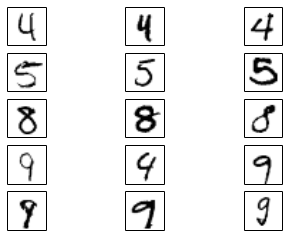

In [394]:
def P5():
#     initialize and fit a K-Nearest-Neighbors classifier with k=1
    knn = KNeighborsClassifier(n_neighbors=1)
    knn.fit(mini_train_data, mini_train_labels)
#     predict labels for the dev data and create a confusion matrix out of them and the real labels
    preds = knn.predict(dev_data)
    conf = confusion_matrix(dev_labels, preds)
#     remove the largest numbers from each row of the confusion matrix, as they correspond to digits being correctly predicted
    f = lambda x : x[x!=max(x)]
    ident_removed = map(f, conf)
#     find the 5 largest remaining numbers, as they correspond to the 5 most confused pairs
    x = np.reshape(ident_removed, (1, 90))
    x.sort()
    x = x[0]
    most_confused = x[85:90]
    confused_pairs = []
#     find the indices of the confusion matrix corresponding to the highest confusion pair number found above
    for i in range(10):
        for j in range(10):
            if conf[i][j] in most_confused:
                confused_pairs.append([i,j])
    
    i = 0
#     for each confused pair, find three examples that were labeled as one but were truly the other
    for confused_pair in confused_pairs:
        confusee = confused_pair[0]
        confuser = confused_pair[1]
        confusion_examples = dev_data[(dev_labels==confusee) & (preds==confuser)][:3]
#         render those examples: the first row has examples of 4 confused with 9, the second 5 confused with 3, 
#         the third 8 confused with 3, the fourth 9 confused with 4, and the fifth 9 confused with 7
        for confusion_example in confusion_examples:
            ax = plt.subplot(5, 3, i + 1)
            plt.setp(ax, xticks=(), yticks=())
            mtrx = np.reshape(confusion_example, (28, 28))
            plt.imshow(mtrx) 
            i += 1
    

P5()

(6) A common image processing technique is to smooth an image by blurring. The idea is that the value of a particular pixel is estimated as the weighted combination of the original value and the values around it. Typically, the blurring is Gaussian -- that is, the weight of a pixel's influence is determined by a Gaussian function over the distance to the relevant pixel.

Implement a simplified Gaussian blur by just using the 8 neighboring pixels: the smoothed value of a pixel is a weighted combination of the original value and the 8 neighboring values. Try applying your blur filter in 3 ways:
- preprocess the training data but not the dev data
- preprocess the dev data but not the training data
- preprocess both training and dev data

Note that there are Guassian blur filters available, for example in scipy.ndimage.filters. You're welcome to experiment with those, but you are likely to get the best results with the simplified version I described above.

[4 pts]

In [396]:
def blur(data):
#         initialize new "blurred" array and create logic to filter out nonexistent pixels
        blurred_data = []
        f = lambda x : x >= 0 and x <= 27
        for example in data:
#             reformat example as 28 x 28 array and initialize the blurred example
            reshaped_example = np.reshape(example, (28, 28))
            blurred_example = []
            for i in range(28):
                for j in range(28):
#                     find existing neighbors of current pixel
                    neighbors = []
                    row_indices = [i-1, i, i+1]
                    row_indices = filter(f, row_indices)
                    col_indices = [j-1, j, j+1]
                    col_indices = filter(f, col_indices)
                    for row_index in row_indices:
                        for col_index in col_indices:
                            if row_index == i and col_index == j:
                                me = reshaped_example[row_index][col_index]
                            else:
                                neighbors.append(reshaped_example[row_index][col_index])
                    
#                     calculate weighted average of pixel and its neighbors, weighting the neighbors half as much
#                     as the current pixel (less if there are an odd number of neighbors), and append to the blurred example
                    neighbors_mean = np.mean(neighbors)
                    half_neighbors_cnt = len(neighbors)/2 
                    blurred_value = (me + half_neighbors_cnt * neighbors_mean) / (1 + half_neighbors_cnt)
                    blurred_example.append(blurred_value)
            blurred_data.append(blurred_example)
        return blurred_data
    
def P6():
    
    
#     initialize KNN classifier with k=1, and fit and score it with each of the combinations called for in the problem
    knn = KNeighborsClassifier(n_neighbors=1)
    blurred_train_data = blur(mini_train_data)
    blurred_dev_data = blur(dev_data)
    knn.fit(blurred_train_data, mini_train_labels)
    print "Accuracy with blurred training data:"
    print knn.score(dev_data, dev_labels)
    print "\n"
    knn.fit(mini_train_data, mini_train_labels)
    print "Accuracy with blurred dev data:"
    print knn.score(blurred_dev_data, dev_labels)
    print "\n"    
    knn.fit(blurred_train_data, mini_train_labels)
    print "Accuracy with blurred training and dev data:"
    print knn.score(blurred_dev_data, dev_labels)               
    

P6()

Accuracy with blurred training data:
0.906


Accuracy with blurred dev data:
0.876


Accuracy with blurred training and dev data:
0.901


ANSWER: The blurring scheme I chose weighted the neighbors a maximum of half as much as the pixel being blurred (less if there were an odd number of neighbors, for coding convenience). The original accuracy of KNN with k=1 was .888; training on blurred data resulted in an increase to .906, while predicting blurred data resulted in a decrease to .876. Combining these two methods yielded a slight improvement to .901.

(7) Fit a Naive Bayes classifier and report accuracy on the dev data. Remember that Naive Bayes estimates P(feature|label). While sklearn can handle real-valued features, let's start by mapping the pixel values to either 0 or 1. You can do this as a preprocessing step, or with the binarize argument. With binary-valued features, you can use BernoulliNB. Next try mapping the pixel values to 0, 1, or 2, representing white, grey, or black. This mapping requires MultinomialNB. Does the multi-class version improve the results? Why or why not?

[4 pts]

In [392]:
def P7():
#     initialize, fit, and predict with a Bernoulli Naive Bayes classifier, rounding observations greater than .5 up to 1 
#     and observations less than or equal to .5 down to zero
    bnb = BernoulliNB(binarize=.5)
    bnb.fit(mini_train_data, mini_train_labels)
    bpreds = bnb.predict(dev_data)
    print "Bernoulli NB accuracy:"
    print np.mean(dev_labels==bpreds)
    print "\n"
#     initialize a multinomial Naive Bayes classifier and initialize the array of bucketed pixels
    mnb = MultinomialNB()
    mtrain_data = np.zeros(mini_train_data.shape)
    for i in range(mini_train_data.shape[0]):
#         transform pixels according to the scheme in the problem
        example = mtrain_data[i]
        original = mini_train_data[i]
        for j in range(mini_train_data.shape[1]):
            if original[j] >= 2.0/3.0:
                example[j] = 2
            elif original[j] >= 1.0/3.0:
                example[j] = 1
            else:
                example[j] = 0
                
#     fit and predict the MNB classifier with the newly transformed data
    mnb.fit(mini_train_data, mini_train_labels)
    print "Multinomial NB accuracy:"
    print mnb.score(dev_data, dev_labels)
    
            

P7()

Bernoulli NB accuracy:
0.817


Multinomial NB accuracy:
0.794


ANSWER: The multi-class version does not improve results. The most likely explanation for this is that binarizing the data filters out noise from the original data in a way that bucketing the data into three classes does not. Particular, one would think people, when drawing digits, are trying to communicate with the shapes of their lines and not how thick they are: therefore, the gray/black distinction here might only introduce confusion.

(8) Use GridSearchCV to perform a search over values of alpha (the Laplace smoothing parameter). What is the best value for alpha? What is the accuracy when alpha=0? Is this what you'd expect?

Note that GridSearchCV partitions the training data so the results will be a bit different than if you used the dev data for evaluation.

[3 pts]

In [393]:
def P8(alphas):
#     initialize a Bernoulli Naive Bayes classifier, rounding observations greater than .5 up to 1 
#     and observations less than or equal to .5 down to zero 
    bnb = BernoulliNB(binarize=.5)
#     initialize GridSearchCV with the BNB classifier and the alphas passed in, and fit it with training data and labels
    gs = GridSearchCV(bnb, alphas)
    gs.fit(mini_train_data, mini_train_labels)
#     report the most successful value of alpha, and the entire list of alphas with their corresponding accuracies
    print "Best estimator:"
    print gs.best_estimator_
    print "\n"
    print "All estimators:"
    print gs.grid_scores_

alphas = {'alpha': [0.0, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]}
nb = P8(alphas)

Best estimator:
BernoulliNB(alpha=0.01, binarize=0.5, class_prior=None, fit_prior=True)


All estimators:
[mean: 0.09200, std: 0.00080, params: {'alpha': 0.0}, mean: 0.81800, std: 0.02216, params: {'alpha': 0.0001}, mean: 0.82000, std: 0.02073, params: {'alpha': 0.001}, mean: 0.82100, std: 0.01811, params: {'alpha': 0.01}, mean: 0.81600, std: 0.01955, params: {'alpha': 0.1}, mean: 0.80300, std: 0.01580, params: {'alpha': 0.5}, mean: 0.80200, std: 0.01767, params: {'alpha': 1.0}, mean: 0.79700, std: 0.01827, params: {'alpha': 2.0}, mean: 0.76000, std: 0.01383, params: {'alpha': 10.0}]


In [99]:
print nb.best_params_

AttributeError: 'NoneType' object has no attribute 'best_params_'

ANSWER: The best value of alpha is .01, with an accuracy of .821. An alpha of 0 leads to an accuracy of .092, which is to be expected given how important smoothing is to making Naive Bayes work. An alpha of 0 means no smoothing, which means if a new unseen digit has even one pixel colored in that none of training examples of that digit have, it won't be classified correctly, no matter how much it looks like the training examples of the correct class otherwise.

(9) Try training a model using GuassianNB, which is intended for real-valued features, and evaluate on the dev data. You'll notice that it doesn't work so well. Try to diagnose the problem. You should be able to find a simple fix that returns the accuracy to around the same rate as BernoulliNB. Explain your solution.

Hint: examine the parameters estimated by the fit() method, theta\_ and sigma\_.

[3 pts]

In [104]:
def P9():
#     initialize and fit a GaussianNB classifier with training data, and calculate accuracy on dev data and labels
    gnb = GaussianNB()
    gnb.fit(mini_train_data, mini_train_labels)
    print "Original accuracy:"
    print gnb.score(dev_data, dev_labels)
    print "\n"
#     add a small value to GNB's standard deviation matrix for each digit for smoothing purposes
    gnb.sigma_ += .01
    print "Accuracy with smoothing:"
    print gnb.score(dev_data, dev_labels)

gnb = P9()

Original accuracy:
0.627


Accuracy with smoothing:
0.789


ANSWER: Examining GNB's paramaters reveals a number of pixels for each digit that have an infinitesimal average and standard deviation, making the model consider them practically impossible; effectively, this model has no smoothing. This can be fixed by adding a small value to the standard deviation matrix for each digit, making a non-zero value for those pixels possible in the eyes of the model and avoiding the no smoothing problem described in problem 8.

(10) Because Naive Bayes is a generative model, we can use the trained model to generate digits. Train a BernoulliNB model and then generate a 10x20 grid with 20 examples of each digit. Because you're using a Bernoulli model, each pixel output will be either 0 or 1. How do the generated digits compare to the training digits?

- You can use np.random.rand() to generate random numbers from a uniform distribution
- The estimated probability of each pixel is stored in feature\_log\_prob\_. You'll need to use np.exp() to convert a log probability back to a probability.

[5 pts]

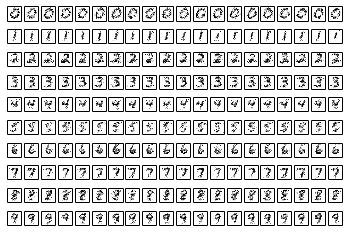

In [44]:
def P10(num_examples):
#     Initialize and fit BNB with a binarization factor of .5
    bnb = BernoulliNB(binarize=.5)
    bnb.fit(mini_train_data, mini_train_labels)
#     Extract the probabilities of each pixel for each class
    per_class_feature_probs = np.exp(bnb.feature_log_prob_)
    x = 0
    for class_feature_probs in per_class_feature_probs:
        for i in range(num_examples):
#             add noise to the pixel probability array for this digit
            noisy_feature_probs = class_feature_probs + np.random.rand(784) / 2 - np.random.rand(784) / 2
#             binarize the new noisy example
            for j in range(784):
                if noisy_feature_probs[j] >= .5:
                    noisy_feature_probs[j] = 1
                else:
                    noisy_feature_probs[j] = 0
#             render the generated digit
            ax = plt.subplot(10, num_examples, x + 1) 
            plt.setp(ax, xticks=(), yticks=())
            mtrx = np.reshape(noisy_feature_probs, (28, 28))
            plt.imshow(mtrx) 
            x += 1
            

P10(20)

ANSWER: The generated digits have less structural variation than the real ones, due to the fact that they were generated from the same set of average pixel values for each digit (e.g. almost all of the ones look like forward slashses, while many real ones look like back slashes). Also, due to the way noise was added to generate different examples of each digit, the generated digits are somewhat blurrier/fuzzier than the real ones.

(11) Remember that a strongly calibrated classifier is rougly 90% accurate when the posterior probability of the predicted class is 0.9. A weakly calibrated classifier is more accurate when the posterior is 90% than when it is 80%. A poorly calibrated classifier has no positive correlation between posterior and accuracy.

Train BernoulliNB model with a reasonable alpha value. Get the maximum posterior probability for each prediction and fill in the corresponding values for "correct" and "total" so you can display the accuracy for each bucket. Don't make the buckets cumulative -- that is, each maximum posterior should correspond to a single bucket.

How would you characterize the calibration for the Naive Bayes model?

[3 pts]

In [110]:
def P11(buckets, correct, total):
#     initialize and fit BNB with a binarization value of .5 and an alpha of .0001
    bnb = BernoulliNB(binarize=.5, alpha=0.0001)
    bnb.fit(mini_train_data, mini_train_labels)
    for i in range(len(dev_data)):
        dev_datum = dev_data[i]
        dev_label = dev_labels[i]
#         find the probability BNB associates with the class it predicts for this example
        posts = bnb.predict_proba(dev_datum)
        max_post = np.max(posts)
#         determine whether the predicted class if correct
        correct_prediction = bnb.predict(dev_datum) == dev_label
        i = 0
#         increment the total and correct counts in the appropriate buckets
        for bucket in buckets:
            if i > 0:
                condition = buckets[i - 1] < max_post <= buckets[i]
            else:
                condition = max_post <= bucket
                
            if condition:
                total[i] += 1.0
                if correct_prediction:
                    correct[i] += 1.0
            i += 1
            

buckets = [0.5, 0.9, 0.999, 0.99999, 0.9999999, 0.999999999, 0.99999999999, 0.9999999999999, 1.0]
correct = [0 for i in buckets]
total = [0 for i in buckets]

P11(buckets, correct, total)
for i in range(len(buckets)):
    accuracy = 0.0
    if (total[i] > 0): accuracy = correct[i] / total[i]
    print 'p(pred) <= %.13f    total = %3d    accuracy = %.3f' %(buckets[i], total[i], accuracy)

p(pred) <= 0.5000000000000    total =   0    accuracy = 0.000
p(pred) <= 0.9000000000000    total =  34    accuracy = 0.324
p(pred) <= 0.9990000000000    total =  79    accuracy = 0.456
p(pred) <= 0.9999900000000    total =  74    accuracy = 0.541
p(pred) <= 0.9999999000000    total =  68    accuracy = 0.735
p(pred) <= 0.9999999990000    total =  51    accuracy = 0.784
p(pred) <= 0.9999999999900    total =  64    accuracy = 0.797
p(pred) <= 0.9999999999999    total =  64    accuracy = 0.891
p(pred) <= 1.0000000000000    total = 566    accuracy = 0.940


ANSWER: I would characterize this classifier as being weakly calibrated. The predicted probabilities don't correspond perfectly to the actual accuracy at each probability level, but they do correlate.

(12) EXTRA CREDIT

Try designing extra features to see if you can improve the performance of Naive Bayes on the dev set. Here are a few ideas to get you started:
- Try summing the pixel values in each row and each column.
- Try counting the number of enclosed regions; 8 usually has 2 enclosed regions, 9 usually has 1, and 7 usually has 0.

Make sure you comment your code well!

For training on the mini training set,
- \> 84% accuracy: 2 pt
- \> 86% accuracy: 4 pts

In [399]:
def P12():
    
P12()

IndentationError: expected an indented block (<ipython-input-399-974391ea993c>, line 4)